In [1]:
RUN = 5

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>Note:</b> the raw code for this notebook is by default hidden for easier reading.
To toggle the code on/off, click <a href="javascript:code_toggle()">here</a>.''')

# Setup

In [3]:
import torch
import Darwin as dw
import seaborn as sns

from torchvision import datasets, transforms
from bogus import atk
from ipywidgets  import interactive, fixed
from bokeh.io import output_notebook

output_notebook()
sns.set()

Loading BokehJS ...

In [4]:
with open(r"D:\TELEGRAM_BOTS\NEURALUPDATES.txt") as file: #Credentials for telegram bot
    telegram_credentials = file.read().split('\n')

In [5]:
transform = transforms.Compose([
                       transforms.ToTensor()])

MNIST_train = datasets.MNIST(r'D:\Data_sets/MNIST', 
                            train=True, download=True,
                            transform=transform)

MNIST_test = datasets.MNIST(r'D:\Data_sets/MNIST', 
                            train=False, download=True,
                            transform=transform)

train_loader = torch.utils.data.DataLoader(
                            MNIST_train, batch_size=64, 
                            shuffle=True, pin_memory=True)

test_loader = torch.utils.data.DataLoader(MNIST_test,
                            batch_size=1000, shuffle=True, 
                            pin_memory=True)

In [6]:
NET_SPACE = {
    'nb_layers': {'lb': 1, 'ub': 3, 'mutate': 0.15},
    'lr': {'lb': 0.001, 'ub':0.1, 'mutate': 0.15},
    'weight_decay': {'lb': 0.00001, 'ub': 0.0004, 'mutate':0.2},
    'optimizer': {'func': ['sgd', 'adam', 'adadelta','rmsprop'], 'mutate': 0.2}
}

In [7]:
LAYER_SPACE = {
    'nb_units':{'lb': 128, 'ub':2048, 'mutate': 0.15},
    'dropout_rate': {'lb': 0.0, 'ub': 0.7, 'mutate': 0.2},
    'activation': {'func': ['linear','tanh','relu','sigmoid','elu'], 'mutate':0.2}
}

In [8]:
atk_func = atk()

# Run 

In [9]:
testing = dw.TournamentOptimizer(3, LAYER_SPACE, NET_SPACE, dw.randomize_network, 
                           dw.mutate_net, dw.NetFromBuildInfo, dw.train, dw.test,
                          train_loader, test_loader, atk_func.fgsm, telegram_credentials, RUN=RUN)

In [10]:
testing.step(generations=2, epochs=1, save=True, phone=False)

Generation 1 Population mean:378.3333333333333 max:1135

Top performers:
0: score:1135
1: score:0


Generation 2 Population mean:664.0 max:1010

Top performers:
0: score:1010
1: score:982



# Plots

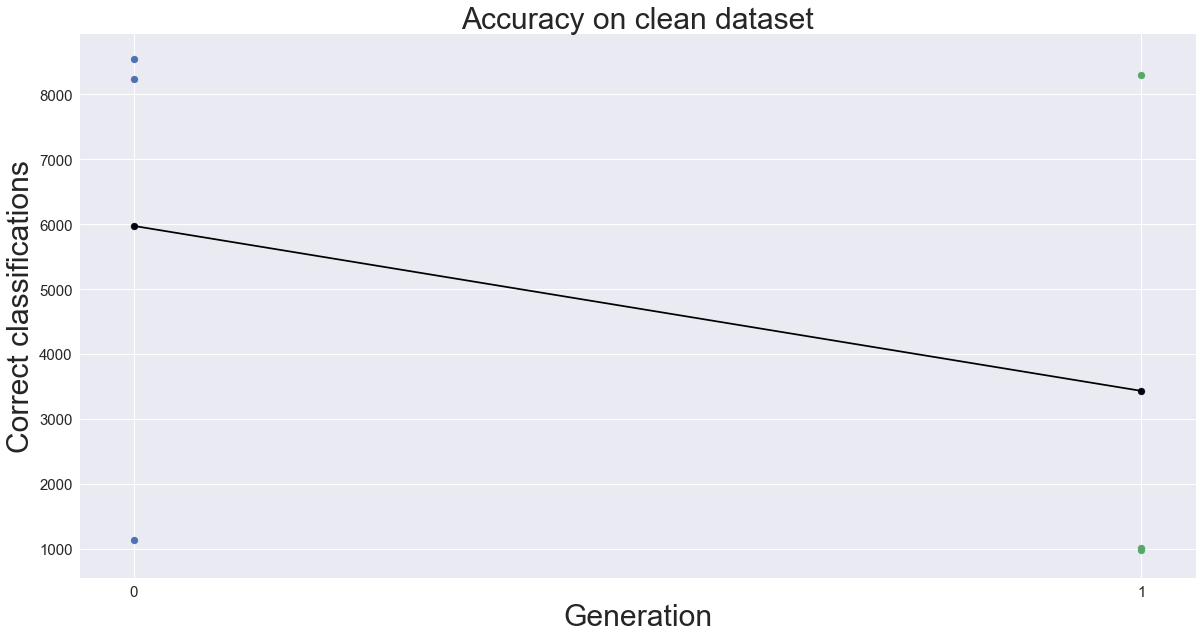

In [11]:
dw.progressplotter(testing, clean=True)

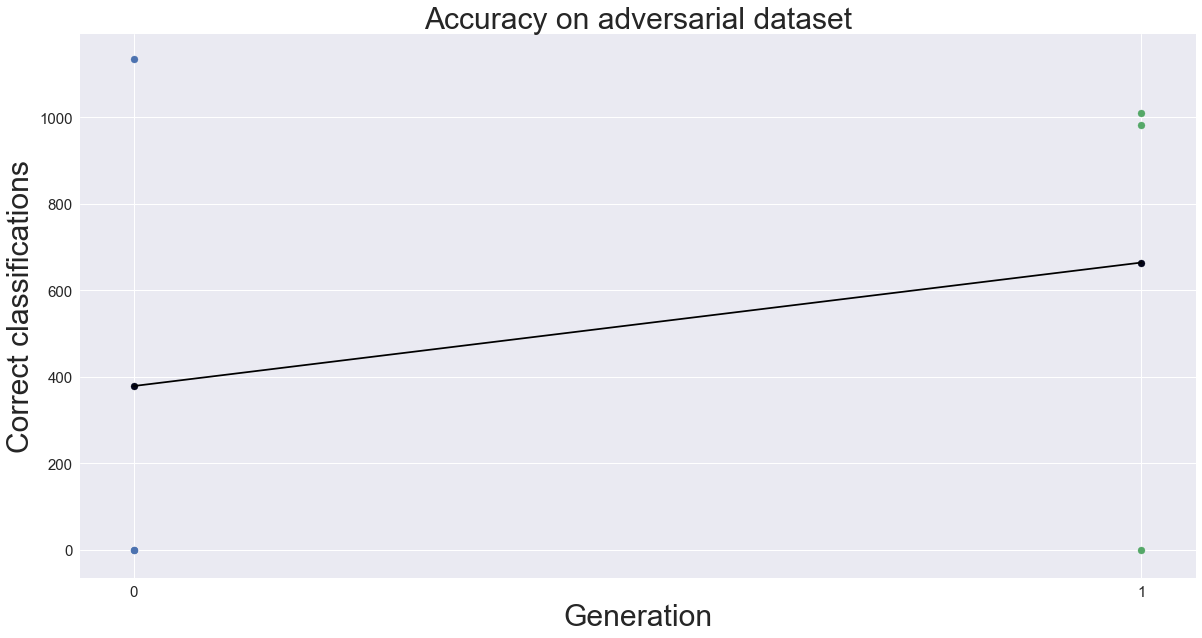

In [12]:
dw.progressplotter(testing)

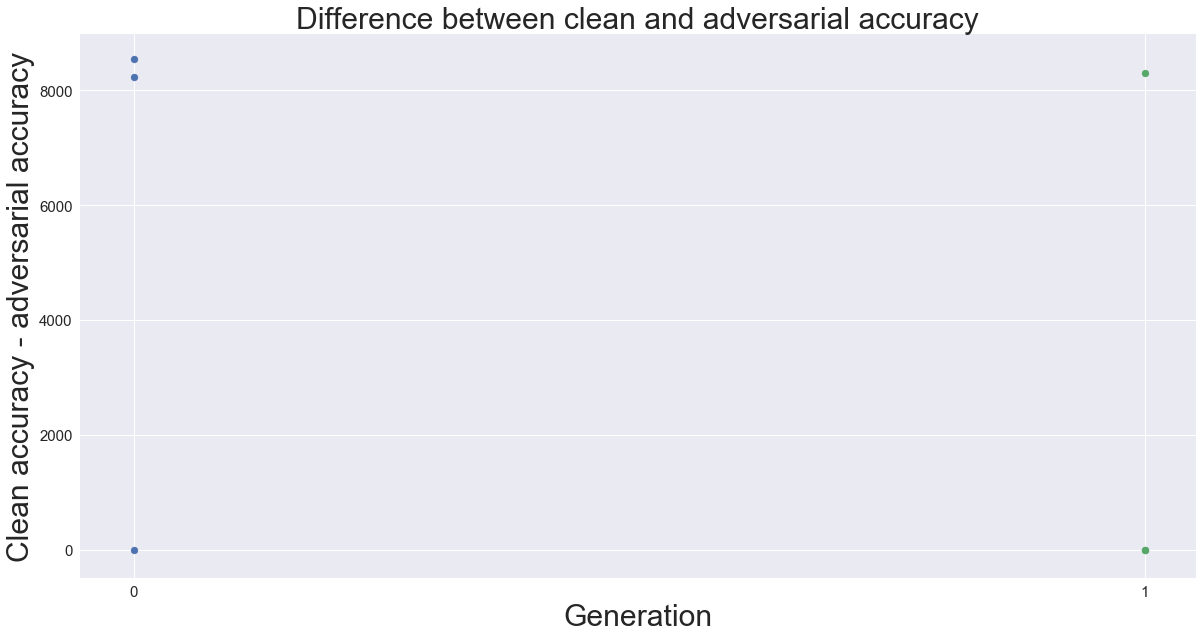

In [13]:
dw.diffplotter(testing)

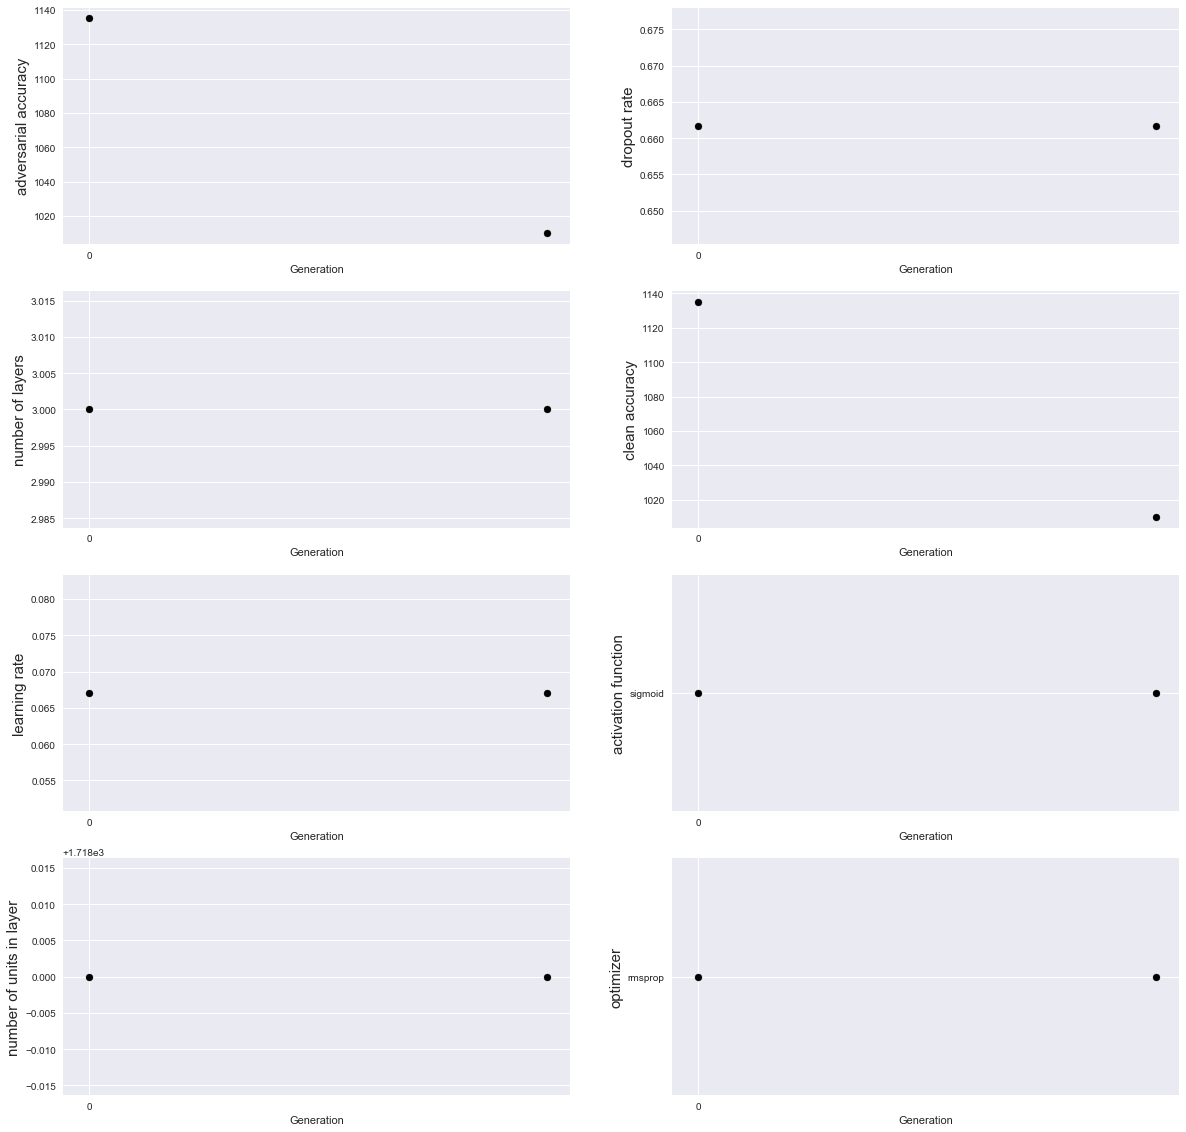

In [14]:
dw.bestplotter(testing, k=0)

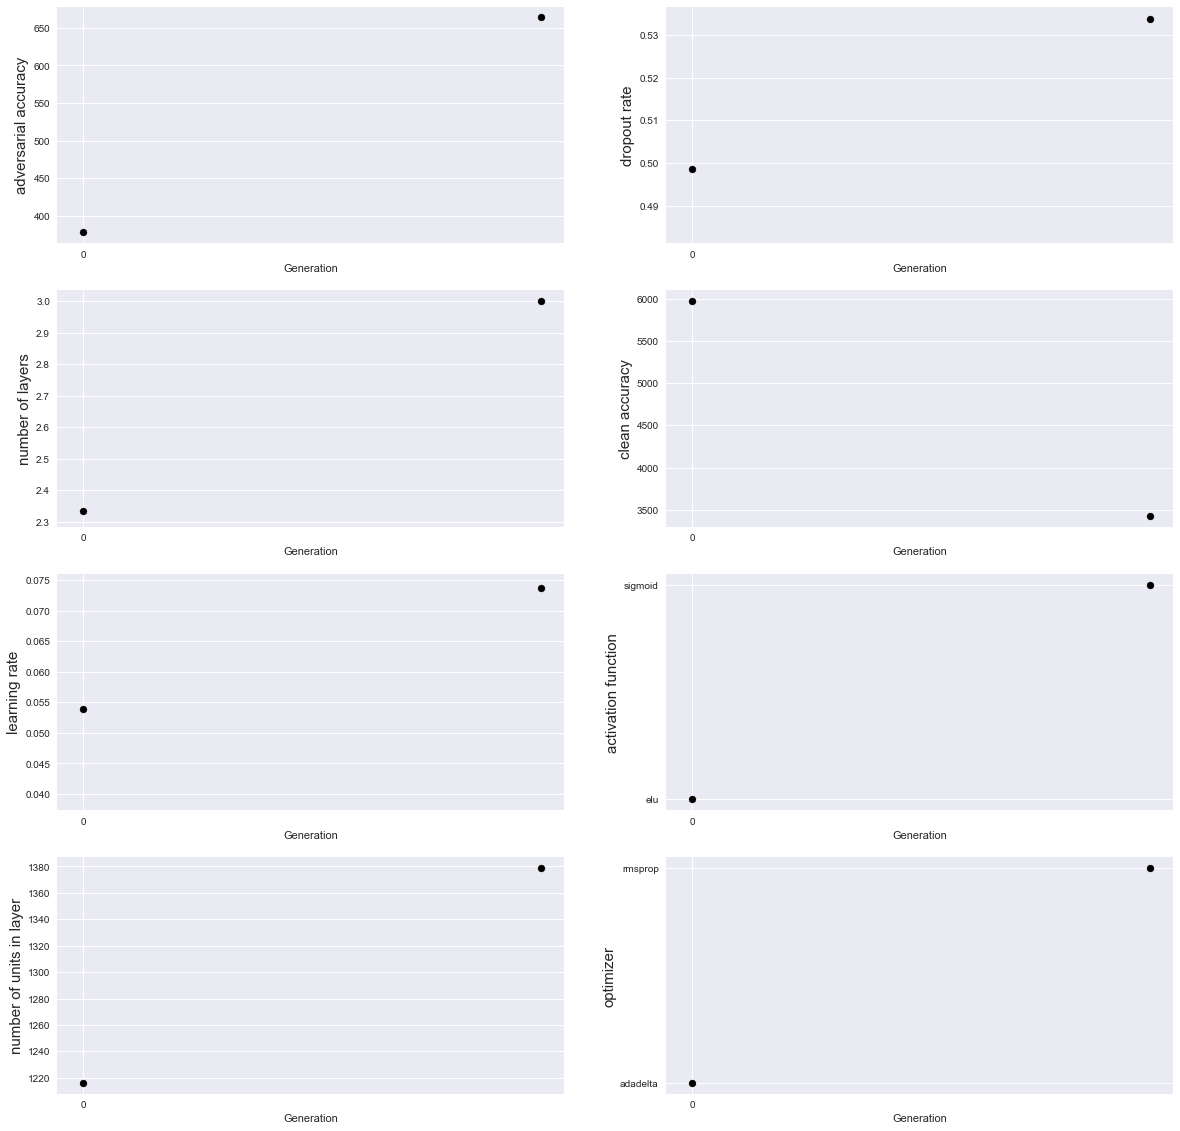

In [15]:
dw.avgplotter(testing)

In [16]:
dw.best_printer(testing, RUN)

,adversarial,clean,generation
best_adversarial,1135,1135,1
best_clean,0,8547,1


Showing best model which was found in generation 1
Clean accuracy = 1135
adversarial accuracy =1135

Model: 

 NetFromBuildInfo(
  (model): Sequential(
    (flatten): Flatten()
    (fc_0): Linear(in_features=784, out_features=1718, bias=True)
    (dropout_0): Dropout(p=0.6616983805049457)
    (sigmoid0): Sigmoid()
    (fc_1): Linear(in_features=1718, out_features=1737, bias=True)
    (dropout_1): Dropout(p=0.09416428424283041)
    (relu1): ReLU()
    (fc_2): Linear(in_features=1737, out_features=1380, bias=True)
    (dropout_2): Dropout(p=0.5638248226844232)
    (sigmoid2): Sigmoid()
    (logits): Linear(in_features=1380, out_features=10, bias=True)
  )
) 

 Images below are adversarial
[[9.16616155e-196 1.00000000e+000 7.55196576e-196 3.25084919e-189
  4.97456834e-275 1.24531982e-193 4.85031482e-190 4.44329366e-195
  0.00000000e+000 4.91404181e-193]]
[[2.12446936e-193 1.00000000e+000 1.75015911e-193 5.99930479e-187
  2.19394006e-271 2.37366417e-191 1.00935505e-187 9.93168255e-193
  0.

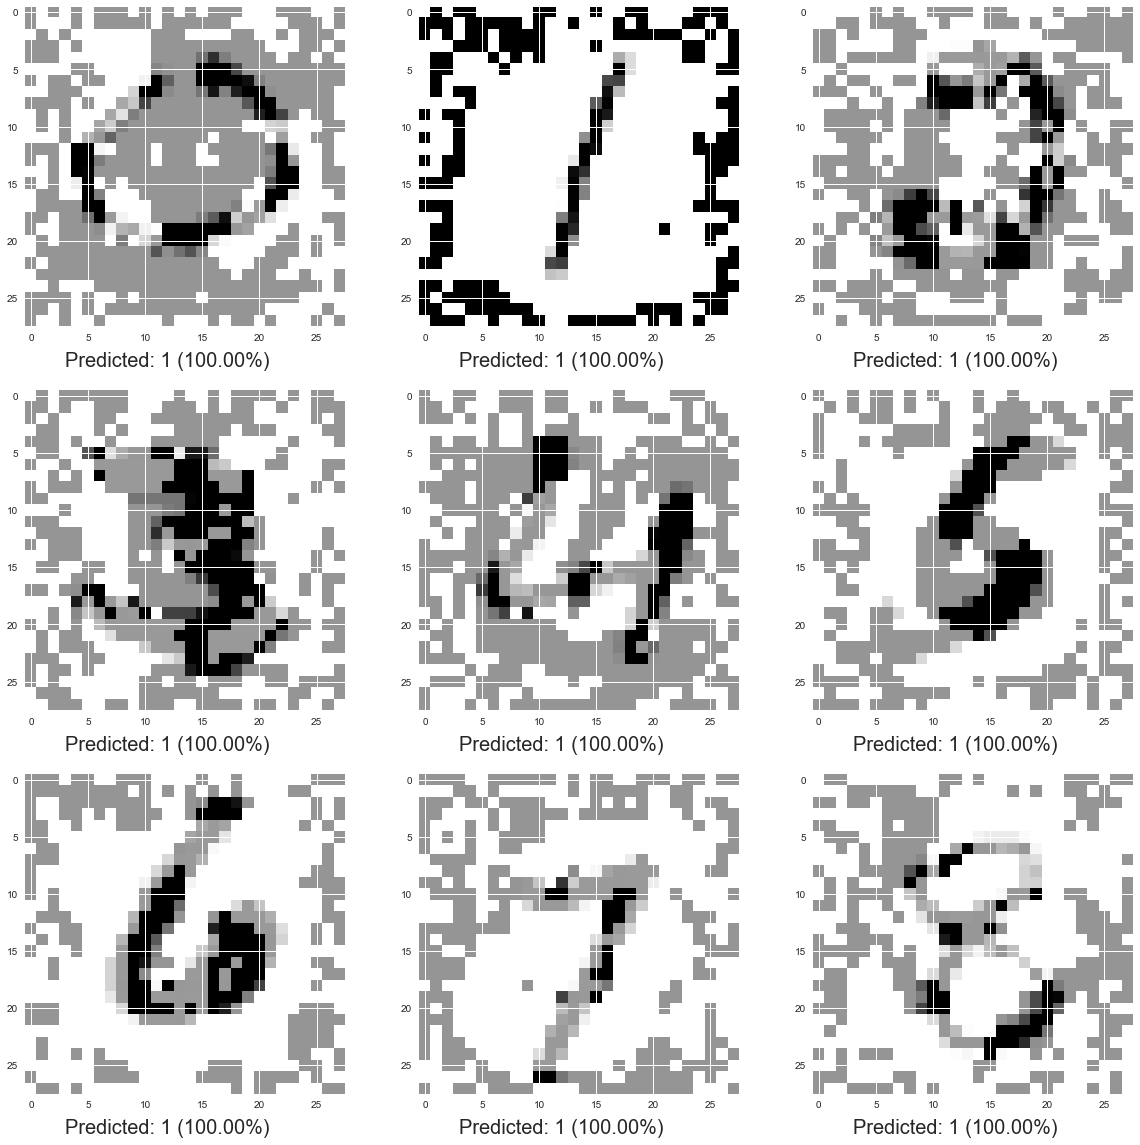

In [17]:
dw.multi_plot(testing, test_loader, RUN, adv_func=atk_func.fgsm, adversarial=True, eps=0.5)

Showing best model which was found in generation 1
Clean accuracy = 1135
adversarial accuracy =1135

Model: 

 NetFromBuildInfo(
  (model): Sequential(
    (flatten): Flatten()
    (fc_0): Linear(in_features=784, out_features=1718, bias=True)
    (dropout_0): Dropout(p=0.6616983805049457)
    (sigmoid0): Sigmoid()
    (fc_1): Linear(in_features=1718, out_features=1737, bias=True)
    (dropout_1): Dropout(p=0.09416428424283041)
    (relu1): ReLU()
    (fc_2): Linear(in_features=1737, out_features=1380, bias=True)
    (dropout_2): Dropout(p=0.5638248226844232)
    (sigmoid2): Sigmoid()
    (logits): Linear(in_features=1380, out_features=10, bias=True)
  )
) 

 Images below are clean
[[1.50269738e-196 1.00000000e+000 1.23237219e-196 6.46152994e-190
  2.99416721e-276 1.90615469e-194 8.79590954e-191 7.16281243e-196
  0.00000000e+000 7.00303667e-194]]
[[4.69731268e-194 1.00000000e+000 3.86845910e-194 1.54398511e-187
  4.45690786e-272 5.25133043e-192 2.24097489e-188 2.14245084e-193
  0.000000

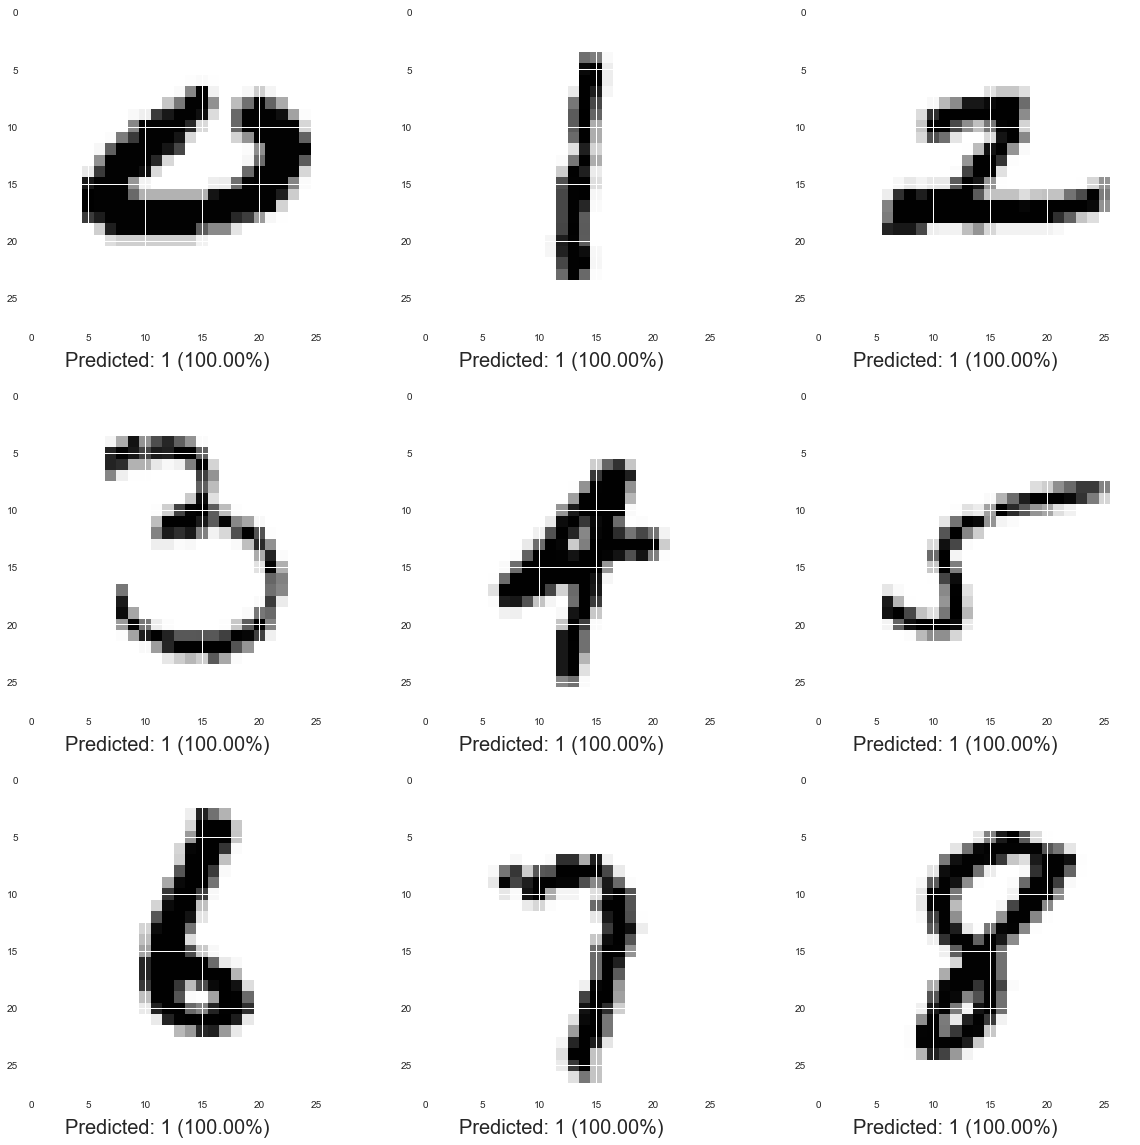

In [18]:
dw.multi_plot(testing, test_loader, RUN, adversarial=False)

In [19]:
df = dw.dataframer(testing)
df.to_pickle(r"../data/neuroevolution{}".format(RUN))

In [20]:
opts = df.columns.tolist()[:-1] #last column contains dicts which causes bokeh to fail
gen_opts = ['all'] + df['Generation'].unique().tolist() 
y1_opts = opts[2:] + opts[:2]
y2_opts = opts[1:] + opts[:1]
interactive_plot = interactive(dw.int_plot, df=fixed(df), x=opts, y=y1_opts, x2=opts, y2=y2_opts, gen=gen_opts)

In [21]:
interactive_plot #bokeh does not show on Github due to JS restrictions

interactive(children=(Dropdown(description='x', options=('Generation', 'Clean', 'Adversarial', 'No_layers', 'L…

# Debugging

In [22]:
model = dw.rebuild_from_save(0,generation=38,position=4,run=1, oldrun=True)

{'weight_decay': 0.0002442487687208515, 'lr': 0.05184926115229526, 'optimizer': 'adadelta', 'layers': [{'activation': 'linear', 'nb_units': 1331, 'dropout_rate': 0.5920481211841264}], 'nb_layers': 1}


In [23]:
dw.test(model, test_loader)

(0.001753286861699102, 8491)

In [24]:
dw.test(model, test_loader, adversarial=True, adv_func=atk_func.fgsm, eps=0.1)

(0.0021614389357894215, 2741)

[[1.37961452e-02 5.31621221e-04 6.58382197e-03 1.51177668e-03
  2.81016671e-03 5.24135541e-03 9.46644559e-01 8.79301891e-04
  1.74472594e-02 4.55399296e-03]]
[[1.76314443e-01 3.23034445e-04 7.60099812e-02 1.03395442e-01
  5.45965218e-03 4.69214127e-02 4.17429672e-03 1.27994259e-02
  5.55447663e-01 1.91546489e-02]]
[[1.04883171e-03 3.92872886e-03 9.61936616e-05 6.04773077e-03
  6.93108165e-03 1.63199451e-03 2.18985031e-04 3.68512531e-02
  7.45943460e-01 1.97301741e-01]]
[[2.19223079e-01 3.15062420e-04 6.64847394e-04 1.63553881e-03
  2.63933979e-03 7.84477615e-02 5.54375169e-03 2.38483335e-03
  6.73020134e-01 1.61256519e-02]]
[[0.07620288 0.00359155 0.12523929 0.15775632 0.00065327 0.00505669
  0.00197914 0.02161748 0.50578848 0.10211488]]
[[1.00060284e-03 7.96055614e-03 5.61639577e-03 1.72729167e-02
  2.16486722e-03 4.90302509e-04 5.06878930e-04 1.65396348e-03
  9.26478636e-01 3.68548802e-02]]
[[0.00053444 0.00312579 0.27386694 0.08934854 0.21343972 0.00966621
  0.00383807 0.0244296  0.

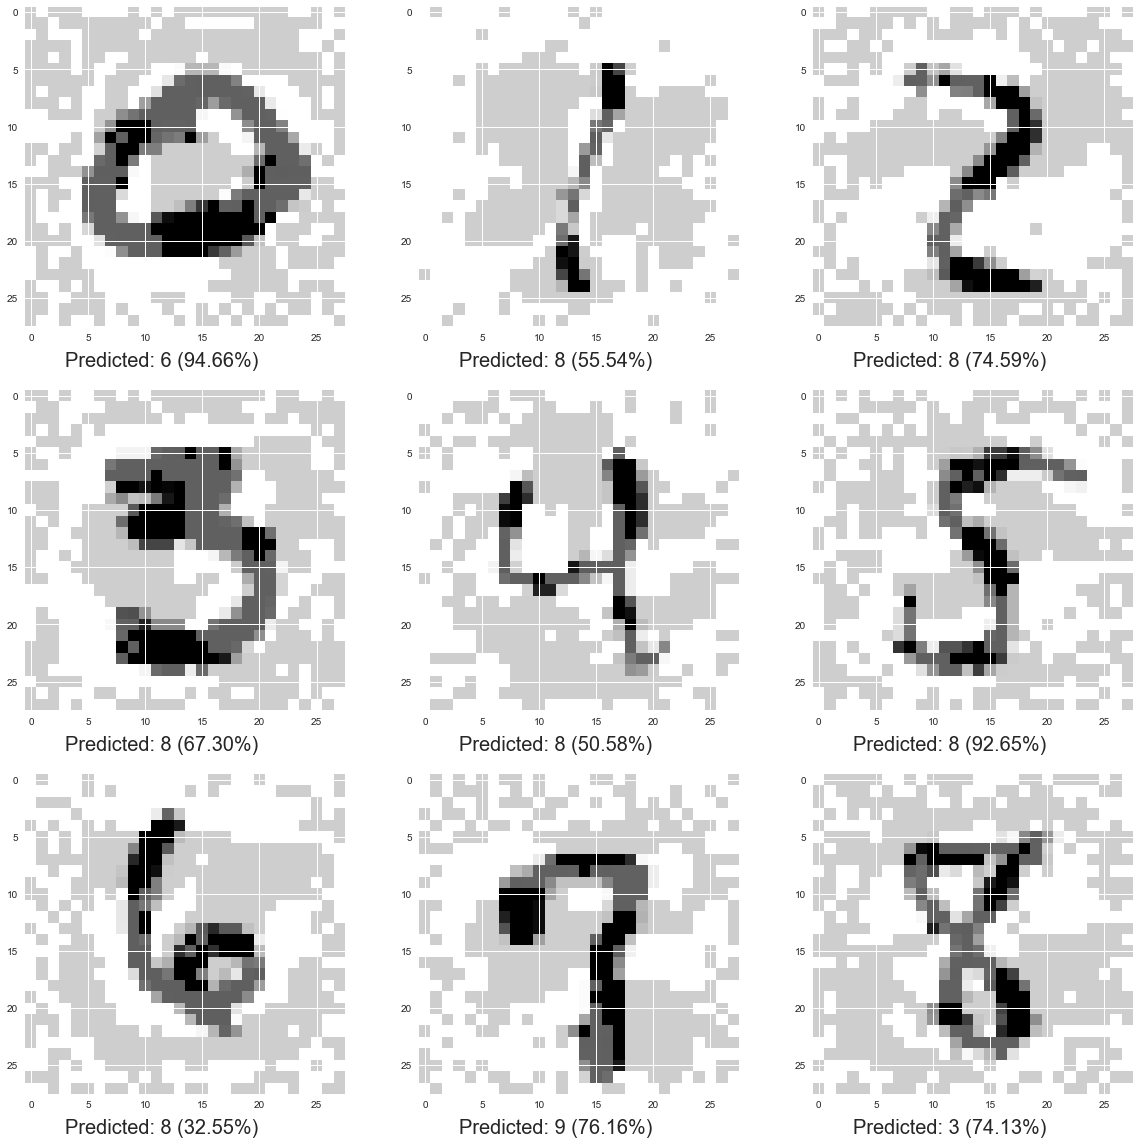

In [25]:
dw.multi_plot(testing, test_loader, RUN, adv_func=atk_func.fgsm, adversarial=True, eps=0.3, model=model)

In [26]:
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

In [27]:
batch = next(iter(test_loader))
img = batch[0][0].data
label = batch[1][0]

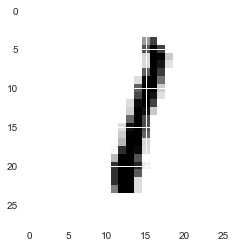

In [28]:
plt.imshow(img.numpy().reshape(28,28), cmap='Greys')

In [29]:
label

tensor(1)

clean softmax =  tensor([[ 0.0011,  0.6803,  0.0561,  0.0466,  0.0036,  0.0032,  0.0170,
          0.0153,  0.1670,  0.0098]], dtype=torch.float64, device='cuda:0') 1 0.6803404983673401 

clean logits =  tensor([[-2.8990,  3.5464,  1.0512,  0.8645, -1.6906, -1.8021, -0.1434,
         -0.2503,  2.1417, -0.6944]], dtype=torch.float64, device='cuda:0') 1 3.546399033958619 

logits = tensor([[  4.6775, -14.5100,   4.8239,   1.9559,  -5.2939,   2.2780,
          -4.3874,  -5.3284,   7.0047,  -3.3775]], dtype=torch.float64, device='cuda:0') 8 7.004665523603142 

softmax = tensor([[ 7.9596e-02,  3.6970e-10,  9.2147e-02,  5.2349e-03,  3.7186e-06,
          7.2242e-03,  9.2057e-06,  3.5923e-06,  8.1576e-01,  2.5273e-05]], dtype=torch.float64, device='cuda:0') 8 0.8157559951433161 



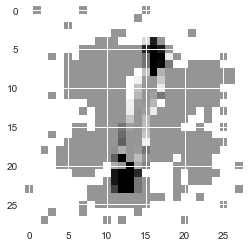

In [30]:
grads = {}

def save_grad(name):  #closure for use as a hook in fgsm attack - otherwise gradients can't be obtained for images. 
    def hook(grad):
        grads[name] = grad
    return hook

x = Variable(img, requires_grad=True).cuda().double()
x.register_hook(save_grad('grad'))
h_adv = model.logits_forward(x)
h = model(x)
h_logs = model.logits_forward(x)
print('clean softmax = ', h.data, h.argmax().item(), h.max().item(), '\n')
print('clean logits = ', h_logs, h_logs.argmax().item(), h_logs.max().item(), '\n')
h_adv.shape
h_adv
h_adv.max()
criterion = torch.nn.CrossEntropyLoss()
cost = criterion(h_adv, label.cuda().view(1))
cost.backward()
imge = (img.double() + grads['grad'].cpu().sign().double() *0.5)
logits = model.logits_forward(imge.cuda())
print('logits =', logits.data, logits.argmax().item(), logits.max().item(), '\n')
soft = model(imge.cuda())
print('softmax =', soft.data, soft.argmax().item(), soft.max().item(), '\n')
imge = imge.cpu().numpy().reshape(28,28)
plt.imshow(imge ,cmap='Greys')